# **Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns


### **TRAINING DATA PRE-PROCESSING**


In [ ]:
full_data = pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
# Data shape
print('train data:',full_data.shape)

train data: (891, 12)


In [ ]:
# View first few rows
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Data**  
From the entry totals above, there appears to be missing data.  A heatmap will help better visualize what features as missing the most information.

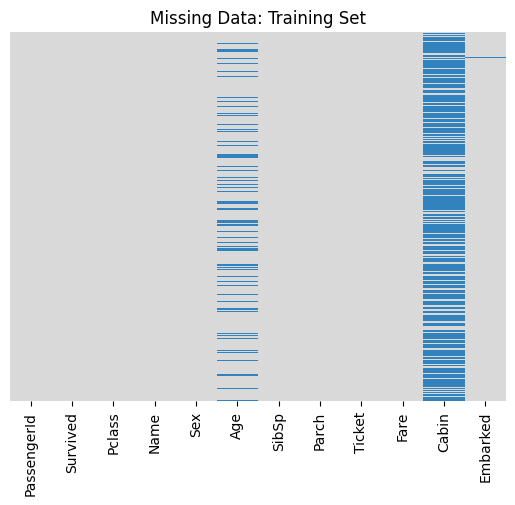

In [ ]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

<ipython-input-6-195810191a3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = full_data, palette= 'GnBu_d').set_title('Age by Passenger Class')


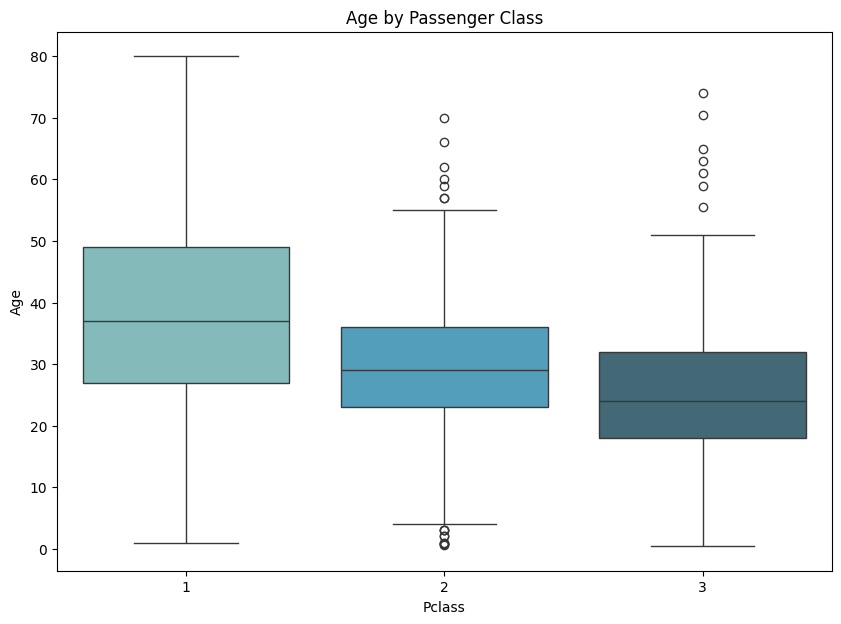

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = full_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

In [ ]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
full_data['Age']=full_data[['Age','Pclass']].apply(impute_age, axis =1 )

<ipython-input-27-1aad74e0a4d9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-27-1aad74e0a4d9>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [ ]:
# Remove Cabin feature
full_data.drop('Cabin', axis = 1, inplace = True)

In [ ]:
# Remove rows with missing data
full_data.dropna(inplace = True)

In [ ]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# Remove unnecessary columns
full_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    full_data[colname] = full_data[colname].astype('category')

In [ ]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


**Numeric Features**

In [ ]:
# Numeric summary
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Remove PassengerId
full_data.drop('PassengerId', inplace = True, axis = 1)

In [ ]:
# Shape of train data
full_data.shape

(889, 8)

In [ ]:
# Identify categorical features
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first = True)

In [ ]:
full_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Add new dummy columns to data frame
full_data = pd.concat([full_data, sex, embarked], axis = 1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [ ]:
# Drop unecessary columns
full_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',full_data.shape)

# Confirm changes
full_data.head()

train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = full_data['Survived'] # y is the column we're trying to predict


In [ ]:
x # x Represents the Features
x.shape

(889, 8)

In [ ]:
y # y represents the Target
y.shape

(889,)

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [ ]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
307,1,17.0,1,0,108.9000,False,False,False
229,3,24.0,3,1,25.4667,False,False,True
82,3,24.0,0,0,7.7875,False,True,False
353,3,25.0,1,0,17.8000,True,False,True
707,1,42.0,0,0,26.2875,True,False,True
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,False,False,True
840,3,20.0,0,0,7.9250,True,False,True
338,3,45.0,0,0,8.0500,True,False,True
524,3,24.0,0,0,7.2292,True,False,False


In [ ]:
# y_train.shape
y_train

,Survived
307,1
229,0
82,1
353,0
707,1
...,...
576,1
840,0
338,1
524,0


In [ ]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.0500,True,False,True
613,3,24.0,0,0,7.7500,True,True,False
615,2,24.0,1,2,65.0000,False,False,True
337,1,41.0,0,0,134.5000,False,False,False
718,3,24.0,0,0,15.5000,True,True,False
...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,True,False,False
450,2,36.0,1,2,27.7500,True,False,True
756,3,28.0,0,0,7.7958,True,False,True
187,1,45.0,0,0,26.5500,True,False,True


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Assuming x_train is your DataFrame with string columns
# ... (your code to load and prepare x_train) ...

# Identify columns with string (object) data type
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Encode categorical features in x_train
for col in categorical_cols:
    x_train[col] = encoder.fit_transform(x_train[col])

### **LOGISTIC REGRESSION**

## **Model Training**

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Model Testing**

## **Class prediction**

In [ ]:
# Predict
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg)
print(y_pred_lreg.shape)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
(178,)


## **Probabilities of each class**

In [ ]:
probabilities = lreg.predict_proba(x_test)[:, 1]
print(probabilities.shape)
print(probabilities)

(178,)
[0.10924113 0.17771566 0.74830557 0.92023846 0.17921639 0.04189796
 0.11562481 0.23012056 0.07881061 0.67517501 0.7882835  0.94477638
 0.10922131 0.5776089  0.10942762 0.12262231 0.9163428  0.84248783
 0.54119061 0.10002657 0.10931987 0.08693341 0.42381024 0.34708548
 0.04221585 0.43915778 0.60032857 0.58884226 0.09292865 0.29925865
 0.09263678 0.25359722 0.01225334 0.10604604 0.10916992 0.11036014
 0.75620335 0.06366716 0.12242805 0.13442805 0.53044558 0.13740802
 0.11913262 0.9276943  0.61213502 0.12699047 0.61567791 0.86574236
 0.10289378 0.26674285 0.48912816 0.79798718 0.16934222 0.12290559
 0.10911267 0.07195553 0.42745956 0.086242   0.07428235 0.91080671
 0.67517501 0.93431974 0.88906641 0.08652889 0.13953638 0.04975229
 0.11566891 0.43217156 0.05800869 0.14300471 0.33803253 0.13590157
 0.61966831 0.8874049  0.11184282 0.72912334 0.08106722 0.13590157
 0.1037412  0.29708608 0.29922938 0.37631939 0.45067441 0.12262231
 0.28125521 0.65849104 0.07120737 0.87045039 0.09894722

## **Probabilities along with the class**

In [ ]:
for i in range(len(y_test)):
  print(round(probabilities[i], 3)," --> ", y_pred_lreg[i])

0.109  -->  0
0.178  -->  0
0.748  -->  1
0.92  -->  1
0.179  -->  0
0.042  -->  0
0.116  -->  0
0.23  -->  0
0.079  -->  0
0.675  -->  1
0.788  -->  1
0.945  -->  1
0.109  -->  0
0.578  -->  1
0.109  -->  0
0.123  -->  0
0.916  -->  1
0.842  -->  1
0.541  -->  1
0.1  -->  0
0.109  -->  0
0.087  -->  0
0.424  -->  0
0.347  -->  0
0.042  -->  0
0.439  -->  0
0.6  -->  1
0.589  -->  1
0.093  -->  0
0.299  -->  0
0.093  -->  0
0.254  -->  0
0.012  -->  0
0.106  -->  0
0.109  -->  0
0.11  -->  0
0.756  -->  1
0.064  -->  0
0.122  -->  0
0.134  -->  0
0.53  -->  1
0.137  -->  0
0.119  -->  0
0.928  -->  1
0.612  -->  1
0.127  -->  0
0.616  -->  1
0.866  -->  1
0.103  -->  0
0.267  -->  0
0.489  -->  0
0.798  -->  1
0.169  -->  0
0.123  -->  0
0.109  -->  0
0.072  -->  0
0.427  -->  0
0.086  -->  0
0.074  -->  0
0.911  -->  1
0.675  -->  1
0.934  -->  1
0.889  -->  1
0.087  -->  0
0.14  -->  0
0.05  -->  0
0.116  -->  0
0.432  -->  0
0.058  -->  0
0.143  -->  0
0.338  -->  0
0.136  -->  0
0.

## **Model Evaluation**

In [ ]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
------------------------------------------------------------
Accuracy 82.02 %


## **Roc Curve**

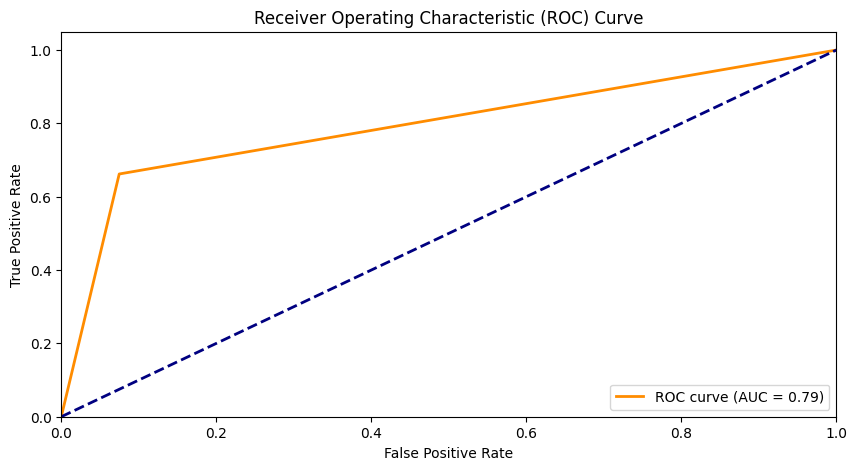

In [ ]:

from sklearn.metrics import roc_curve, auc

# Assuming you have your model's predictions and true labels
y_true = y_test # True labels
y_pred = y_pred_lreg# Model predictions

# Plot the ROC Curve and calculate the AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


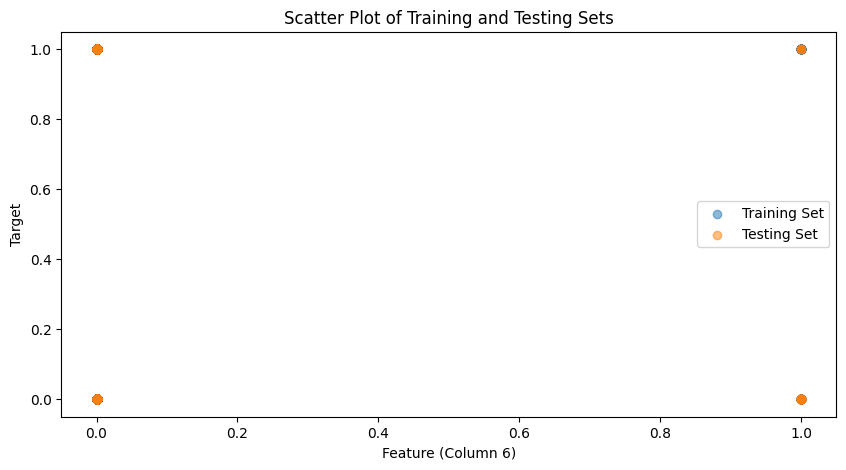

In [ ]:
# Visualize the results using a scatter plot
# Assuming you have train_X, train_y, test_X, and test_y
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Choose one feature to plot against the target variable.
# Here, we choose the first column of x_train (index 0).
# You can change this index to plot other features.
feature_index = 6
x_train_plot = x_train.iloc[:, feature_index]

# Now plot the data
plt.scatter(x_train_plot, y_train, label='Training Set', alpha=0.5)

# Similarily, choose one feature from x_test.
x_test_plot = x_test.iloc[:, feature_index]
plt.scatter(x_test_plot, y_test, label='Testing Set', alpha=0.5)

plt.xlabel(f'Feature (Column {feature_index})')  # Label the x-axis with the feature name
plt.ylabel('Target')
plt.title('Scatter Plot of Training and Testing Sets')
plt.legend()
plt.show()

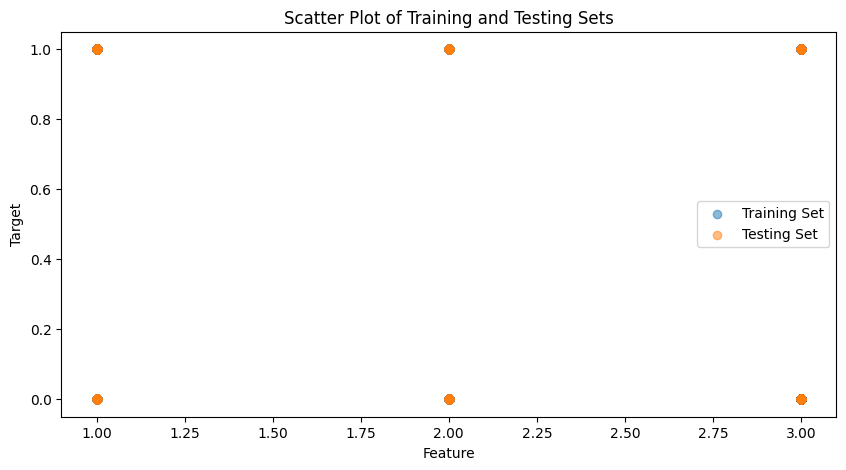

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have train_X, train_y, test_X, and test_y
fig, ax = plt.subplots(figsize=(10, 5))

# Check if x_train has multiple columns (features)
if x_train.shape[1] > 1:
    # Choose one feature to plot against the target variable (e.g., the first column)
    x_train_plot = x_train.iloc[:, 0]
    x_test_plot = x_test.iloc[:, 0]
else:
    x_train_plot = x_train
    x_test_plot = x_test

# Ensure x and y have the same length by potentially truncating or reshaping
min_len = min(len(x_train_plot), len(y_train))
ax.scatter(x_train_plot[:min_len], y_train[:min_len], label='Training Set', alpha=0.5)

min_len = min(len(x_test_plot), len(y_test))
ax.scatter(x_test_plot[:min_len], y_test[:min_len], label='Testing Set', alpha=0.5)

ax.set_xlabel('Feature')
ax.set_ylabel('Target')
ax.set_title('Scatter Plot of Training and Testing Sets')
ax.legend()
plt.show()